# Checking different models

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#reading data
data = pd.read_csv('data.csv')

#splitting data
X = data.iloc[:,0:-1]
y = data['satisfaction']

#splitting into train test (split is still default 0.75)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
#plotting function
def plot_results(clf, parameter, range_list):
    test_scores = clf.cv_results_['mean_test_score']
    train_scores = clf.cv_results_['mean_train_score']

    print('The optimal {} from the grid search: '.format(parameter), range_list[np.argmax(test_scores)])

    plt.plot(range_list, train_scores, label="training accuracy")
    plt.plot(range_list, test_scores, label="test accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel(parameter)
    plt.legend()
    plt.show()

## Regression

### least squares regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

#scores
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))
print("R^2 score: {:.2f}\n".format(r2_score(y_test, y_pred)))

print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test))) 

MSE: 0.00
R^2 score: 0.64

Training set score: 0.65
Test set score: 0.64


### Ridge regression

For Ridge regression we will try to optimise the alpha. We will start by ranging the alpha parameter from -50 to 50 by using linspace. 

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge().fit(X_train, y_train)

#gridsearch
parameters = {'alpha': np.linspace(-50, 50, num=500)}
clf = GridSearchCV(ridge, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

By plotting the results of the first grid search we can see where the optimum is for the accuracy on the test set. We will further refine this by doing another grid search with new parameters that will be around the optimal alpha value from the first grid search.

The optimal alpha from the grid search:  0.501002004008015


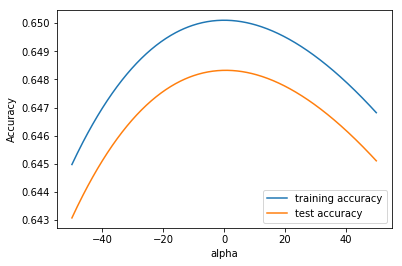

In [10]:
plot_results(clf,'alpha',np.linspace(-50, 50, num=500))

In [11]:
#gridsearch
parameters = {'alpha': np.linspace(0.25, 0.75, num=500)}
clf = GridSearchCV(ridge, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

alpha_ridge = clf.best_params_['alpha']

ridge_optimal = Ridge(alpha = alpha_ridge).fit(X_train, y_train )

print("alpha = {:.2f}".format(alpha_ridge))
print("Training set score: {:.2f}".format(ridge_optimal.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge_optimal.score(X_test, y_test))) 

alpha = 0.55
Training set score: 0.65
Test set score: 0.64


The alpha increased from 0.5 to 0.55, but the scores haven't really changed that much. So, the result from the first gridsearch was already a usable result. For Ridge regression, if alpha is equal to 0 we will have OLS regression. 

### Lasso regression

For Lasso regression we will also optimize for the alpha parameter just like with Ridge regression. The difference between Lasso and Ridge regression is that with Lasso regression L1 regularization is used, where L2 regularization is used for Ridge. The first grid seach was done with a range from 0.01 to 10, but soon it was set 0.0000000001 to 0.001.

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso()

#gridsearch
parameters = {'alpha': np.linspace(0.0000000001, 0.001, num=500)}
clf = GridSearchCV(lasso, parameters, cv=5,return_train_score=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

The optimal alpha from the grid search:  2.2044097955911825e-06


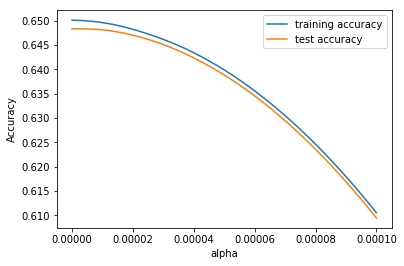

In [13]:
plot_results(clf,'alpha',np.linspace(0.000000000001, 0.0001, num=500))

From the plot of the first grid search we can see that the alpha needs to be as small as possible to get the best results. Therefore in the next grid search the alpha range is lowered even further to improve the model.

In [14]:
lasso = Lasso()

#gridsearch
parameters = {'alpha': np.linspace(0.0000000000000001, 0.001, num=500)}
clf = GridSearchCV(lasso, parameters, cv=5)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

alpha_lasso = clf.best_params_['alpha']

lasso_optimal = Lasso(alpha = alpha_lasso).fit(X_train, y_train)

print("alpha = {:.2f}".format(alpha_lasso))
print("Training set score: {:.2f}".format(lasso_optimal.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso_optimal.score(X_test, y_test))) 

alpha = 0.00
Training set score: 0.65
Test set score: 0.64


The optimal alpha from this grid search is almost equal to 0.

### plotting the coefficient magnitudes for different methods

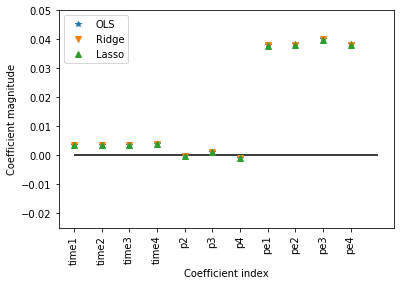

In [15]:
#plotting
plt.plot(lr.coef_.T, '*', label="OLS")
plt.plot(ridge_optimal.coef_.T, 'v', label="Ridge")
plt.plot(lasso_optimal.coef_.T, '^', label="Lasso")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.ylim(-0.025, 0.05)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()
plt.show()

From the results of earlier we found that all regression methods yield the same (train and test) results. We can also see from the above plot that all regression methods assign similair coefficient magnitudes.

# Classification

In [16]:
y = y.apply(lambda x: 1 if x >= 0 else 0)

In [17]:
#splitting into train test (split is still default 0.75)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## k-NN

For k-NN the gridsearch will be performed for finding the optimal number of neighbors used in the model. The range is set from 1 to 20.

optimal n = 13.00
Training set score: 0.83
Test set score: 0.79


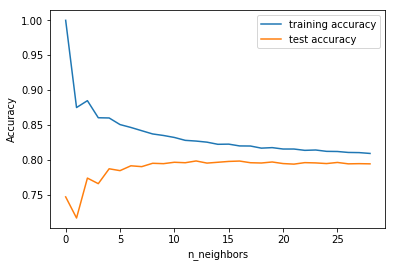

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

#gridsearch
parameters = {'n_neighbors': [i for i in range(1,30)]}
clf = GridSearchCV(knn, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

n_optimal = clf.best_params_['n_neighbors']
knn_optimal = KNeighborsClassifier(n_neighbors=n_optimal).fit(X_train, y_train)

#scores
print("optimal n = {:.2f}".format(n_optimal))
print("Training set score: {:.2f}".format(knn_optimal.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(knn_optimal.score(X_test, y_test)))

test_scores = clf.cv_results_['mean_test_score']
train_scores = clf.cv_results_['mean_train_score']

plt.plot([i for i in range(len(train_scores))], train_scores, label="training accuracy")
plt.plot([i for i in range(len(test_scores))], test_scores,  label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

From the grid search we found that n=13 is the optimal number of neighbors used in the model. We can also check the plot and see that after n=13 the test accuracy stays similair.

## SVM

For the gridsearch for SVM we will start of with values for C between 0.01 and 10. 

In [19]:
from sklearn.svm import LinearSVC

svm = LinearSVC()

#gridsearch
parameters = {'C': np.linspace(0.01, 10, num=20)}
clf = GridSearchCV(svm, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: Conver

/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: Conver

/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sebastiaanvergunst/anaconda3/lib/python3.6/site-packages/sklearn/svm/_base.py:947: Conver

The optimal C from the grid search:  0.5357894736842106


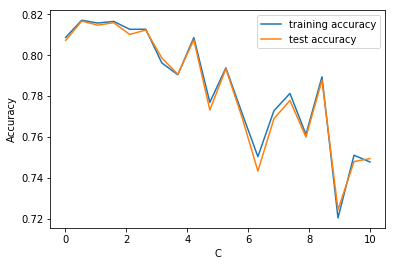

In [20]:
plot_results(clf,'C',np.linspace(0.01, 10, num=20))

From the first grid search we can see that the optimal C lies somewhere between 0 and 2.

The optimal C from the grid search:  0.07692307692307693


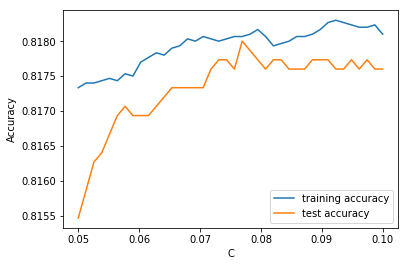

optimal C = 0.08
Training set score: 0.82
Test set score: 0.81


In [21]:
#gridsearch 
parameters = {'C': np.linspace(0.05, 0.10, num=40)}
clf = GridSearchCV(svm, parameters, cv=5, return_train_score=True)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

C_optimal = clf.best_params_['C']
svm_optimal = LinearSVC(C=C_optimal).fit(X_train, y_train)

plot_results(clf,'C',np.linspace(0.05, 0.10, num=40))

#scores
print("optimal C = {:.2f}".format(C_optimal))
print("Training set score: {:.2f}".format(svm_optimal.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(svm_optimal.score(X_test, y_test)))

From the final grid search we can see that the optimal C lies around 0.08. Further optimisation doesn't yield higher results, since the Accuracy will not differ that much anymore on this scale.